In [2]:
!pip install git+https://github.com/VU-Cog-Sci/nideconv

  Cloning https://github.com/VU-Cog-Sci/nideconv to /tmp/pip-req-build-ohiiell0
  Running command git clone --filter=blob:none --quiet https://github.com/VU-Cog-Sci/nideconv /tmp/pip-req-build-ohiiell0
  Resolved https://github.com/VU-Cog-Sci/nideconv to commit da80c42e1cc7ba63ade73cf1a4ccd0fc91ece70a
  Preparing metadata (setup.py) ... done


In [3]:
!pip install pystan

In [4]:
from nilearn import datasets
from nideconv.utils import roi
import pandas as pd
from nilearn import plotting
import nibabel as nib
import bids

In [5]:
sub_peek = '0001'

In [11]:
func = f'../shared/ds003097/derivatives/fmriprep/sub-{sub_peek}/func/sub-{sub_peek}_task-moviewatching_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
func

'../shared/ds003097/derivatives/fmriprep/sub-0001/func/sub-0001_task-moviewatching_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'

In [12]:
confounds_fn = f'../shared/ds003097/derivatives/fmriprep/sub-{sub_peek}/func/sub-{sub_peek}_task-moviewatching_desc-confounds_regressors.tsv'
confounds_fn

'../shared/ds003097/derivatives/fmriprep/sub-0001/func/sub-0001_task-moviewatching_desc-confounds_regressors.tsv'

In [13]:
confounds = pd.read_table(confounds_fn).fillna(method='bfill')

In [14]:
# We only want to include a subset of confounds
#list(confounds.columns)
confounds_to_include = ['framewise_displacement', 'a_comp_cor_00',
                        'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03',
                        'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z',
                        'rot_x', 'rot_y', 'rot_z']
confounds = confounds[confounds_to_include]

/srv/conda/envs/notebook/lib/python3.7/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/srv/conda/envs/notebook/lib/python3.7/site-packages/nilearn/plotting/displays/_axes.py:73: UserWarning: No contour levels were found within the data range.
  **kwargs)


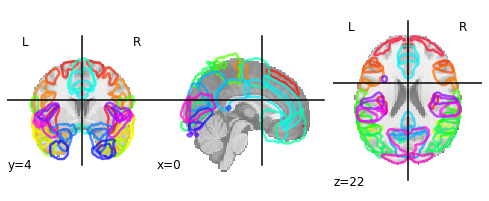

In [10]:
# Use the cortical Harvard-Oxford atlas
atlas_harvard_oxford = datasets.fetch_atlas_harvard_oxford('cort-prob-2mm')
plotting.plot_prob_atlas(atlas_harvard_oxford.maps)

In [15]:
ts = roi.extract_timecourse_from_nii(atlas_harvard_oxford,
                                     func,
                                     confounds=confounds.values,
                                     t_r=1.5,
                                     high_pass=1./128,
                                     )

In [16]:
print(ts.head())

roi   Frontal Pole  Insular Cortex  Superior Frontal Gyrus  \
time                                                         
0.0      -0.000384       -0.000119                0.000220   
1.5      -0.004521       -0.000628               -0.004367   
3.0      -0.004575       -0.001961               -0.007747   
4.5       0.004254        0.003988               -0.001187   
6.0      -0.000985        0.000364               -0.006716   

roi   Middle Frontal Gyrus  Inferior Frontal Gyrus, pars triangularis  \
time                                                                    
0.0              -0.000557                                  -0.002037   
1.5               0.007030                                  -0.004049   
3.0              -0.002724                                   0.000014   
4.5               0.004458                                   0.014700   
6.0              -0.003703                                   0.005244   

roi   Inferior Frontal Gyrus, pars opercularis  Prece